In [1]:
import new_adventure as na
import new_adventure.derivative_free_estimation as dfe
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

In [2]:
mu = np.array([0])
cov = np.array([[1]])

Q = np.array([[1]])

f = na.Functions.Quadratic(Q)

# for tau in np.linspace(0, 1, 10):

In [65]:
all_mse = []
all_approx = []

start_theta = 0 
end_theta = 5
num_points = 10

N = 1000
for t in np.linspace(start_theta, end_theta, num_points):
    mse = []
    approxs = []
    taus = np.linspace(0.01, 2, 25)
    theta_star = np.array([t])
    curr_hessian = f.f2(np.array([theta_star]))
    for tau in taus:
        curr_errs = []
        curr_approx = []
        for _ in range(100):
            approx = dfe.second_shift_estimator(f, theta_star, cov, tau, N=N, control_variate=False)
            approx = np.array([approx])
#             print(approx)
            curr_approx.append(approx[0])
            curr_errs.append((approx - curr_hessian).reshape(-1).dot((approx - curr_hessian).reshape(-1)))
        mse.append(np.mean(curr_errs))
        approxs.append(np.mean(curr_approx))
    all_mse.append(mse)
    all_approx.append(approxs)

In [220]:
dfe.second_shift_estimator(f, theta_star, cov, 0.1, N=2000, control_variate=True)

0.01615595817565918
[[0.00821253]]
0.00020599365234375
[[0.00821253]]


array([[-10.98418216]])

In [138]:
theta_star

array([5.])

0.0
0.5555555555555556
1.1111111111111112
1.6666666666666667
2.2222222222222223
2.7777777777777777
3.3333333333333335
3.8888888888888893
4.444444444444445
5.0


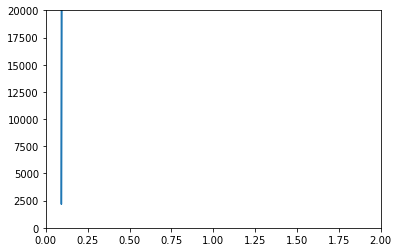

In [70]:
for i, t in enumerate(np.linspace(start_theta, end_theta, num_points)):
    print(t)
    plt.plot(taus, all_mse[i])
    plt.ylim(0, 20000)
    plt.xlim(0, 2)

In [ ]:
for i, t in enumerate(np.linspace(start_theta, end_theta, num_points)):
    print(t)
    plt.plot(taus, all_approx[i])

[autoreload of new_adventure.derivative_free_estimation failed: Traceback (most recent call last):
  File "/Users/daniellengyel/miniconda3/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 244, in check
    superreload(m, reload, self.old_objects)
  File "/Users/daniellengyel/miniconda3/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 374, in superreload
    module = reload(module)
  File "/Users/daniellengyel/miniconda3/lib/python3.6/imp.py", line 315, in reload
    return importlib.reload(module)
  File "/Users/daniellengyel/miniconda3/lib/python3.6/importlib/__init__.py", line 166, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 618, in _exec
  File "<frozen importlib._bootstrap_external>", line 674, in exec_module
  File "<frozen importlib._bootstrap_external>", line 781, in get_code
  File "<frozen importlib._bootstrap_external>", line 741, in source_to_code
  File "<frozen importlib._bootstrap>", line 

0.0
0.5555555555555556
1.1111111111111112
1.6666666666666667
2.2222222222222223
2.7777777777777777
3.3333333333333335
3.8888888888888893
4.444444444444445
5.0


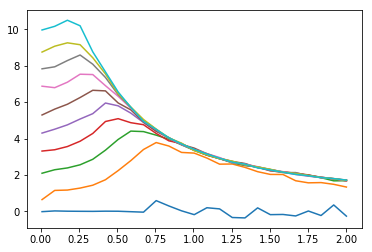

In [45]:
for i, t in enumerate(np.linspace(start_theta, end_theta, num_points)):
    print(t)
    plt.plot(taus, all_approx[i])

In [63]:
def costum(xs, weights):
    """xs.shape = (N, d), weights.shape = (N)"""
    xs_adjusted = (xs.T - xs.T * weights).T
    outer_adjusted = np.array([np.outer(x_adjusted, x_adjusted) for x_adjusted in xs_adjusted])
    res = None
    for i, o in enumerate(outer_adjusted): 
        if res is None:
            res = weights[i] * o
        else:
            res += weights[i] * o
    return res

xs = np.array([[1, 2], [3, 4]])
weights = np.array([0.5 , 0.1])
costum(xs, weights)

[[[ 0.25  0.5 ]
  [ 0.5   1.  ]]

 [[ 7.29  9.72]
  [ 9.72 12.96]]]
[[0.854 1.222]
 [1.222 1.796]]


0.0
0.5555555555555556
1.1111111111111112
1.6666666666666667
2.2222222222222223
2.7777777777777777
3.3333333333333335
3.8888888888888893
4.444444444444445
5.0


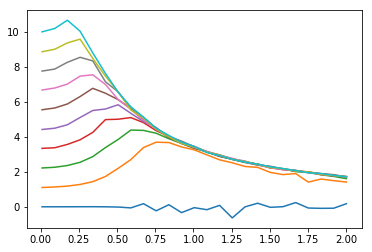

In [43]:
for i, t in enumerate(np.linspace(0, 5, 10)):
    print(t)
    plt.plot(taus, all_approx[i])

In [44]:
all_mse = []
all_approx = []

start_theta = 0 
end_theta = 5
num_points = 10

N = 2000
for t in np.linspace(start_theta, end_theta, num_points):
    mse = []
    approxs = []
    taus = np.linspace(0.01, 2, 25)
    theta_star = np.array([t])
    curr_derivative = f.f1(np.array([theta_star]))
    for tau in taus:
        curr_errs = []
        curr_approx = []
        for _ in range(100):
            approx = dfe.first_shift_estimator(f, theta_star, cov, tau, N=N, control_variate=False)
            approx = np.array([approx])
            curr_approx.append(approx[0])
            curr_errs.append((approx - curr_derivative).dot(approx - curr_derivative))
        mse.append(np.mean(curr_errs))
        approxs.append(np.mean(curr_approx))
    all_mse.append(mse)
    all_approx.append(approxs)

In [190]:
all_mse = []
all_approx = []

N = 1000
for t in np.linspace(0, 5, 10):
    mse = []
    approxs = []
    taus = np.linspace(0.01, 2, 100)
    theta_star = np.array([t])
    curr_derivative = na.Functions.Log_Liklihood(f).f1(np.array([theta_star]))
    for tau in taus:
        curr_errs = []
        curr_approx = []
        for _ in range(100):
            approx = dfe.doucet_first_order(na.Functions.Log_Liklihood(f), theta_star, cov, tau, N=N, control_variate=False)
            approx = np.array([approx])
            curr_approx.append(approx[0])
            curr_errs.append((approx - curr_derivative).dot(approx - curr_derivative))
        mse.append(np.mean(curr_errs))
        approxs.append(np.mean(curr_approx))
    all_mse.append(mse)
    all_approx.append(approxs)

0.0
0.5555555555555556
1.1111111111111112
1.6666666666666667
2.2222222222222223
2.7777777777777777
3.3333333333333335
3.8888888888888893
4.444444444444445
5.0


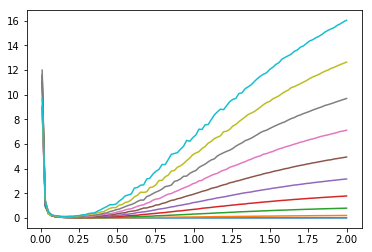

In [191]:
for i, t in enumerate(np.linspace(0, 5, 10)):
    print(t)
    plt.plot(taus, all_mse[i])
# plt.ylim(0, 0.2)

0.0
0.5555555555555556
1.1111111111111112
1.6666666666666667
2.2222222222222223
2.7777777777777777
3.3333333333333335
3.8888888888888893
4.444444444444445
5.0


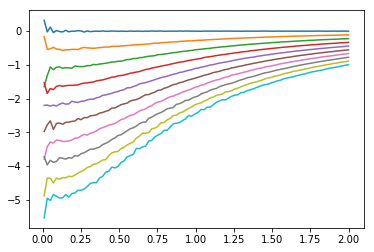

In [192]:
for i, t in enumerate(np.linspace(0, 5, 10)):
    print(t)
    plt.plot(taus, all_approx[i])

In [115]:
p_1 = np.array([[1, 0.8], [0.8, 1]])
p_2 = np.array([[0.8, 0.4], [0.4, 1]])

y = np.array([0, 0])
g_exp2 = na.Functions.Gaussian_example2(y, 100, np.linalg.inv(p_1), np.linalg.inv(p_2))
# g_exp2.f(theta_star)

In [116]:
tau = 0.5
theta_star =  np.array([1, 1])
# dfe.doucet_first_order(na.Functions(Log_Liklihood(g_exp2), theta_star, cov, tau, N=10)
exact_f = na.Functions.Gaussian(theta_star, np.linalg.inv(np.linalg.inv(p_1) + np.linalg.inv(p_2)))

In [127]:
N = 100
M = 1000
mse = []
f = g_exp2
taus = np.linspace(0.01, 2, 10)
cov = np.array([[1, 0], [0, 1]])
curr_derivative = na.Functions.Log_Liklihood(exact_f).f1(np.array([theta_star]))
for tau in taus:
    curr_errs = []
    for _ in range(100):
        approx = dfe.doucet_first_order(na.Functions.Log_Liklihood(f), theta_star, cov, tau, N=N)
        approx = np.array([approx])
        curr_errs.append((approx - curr_derivative).T.dot(approx - curr_derivative))
    mse.append(np.mean(curr_errs))

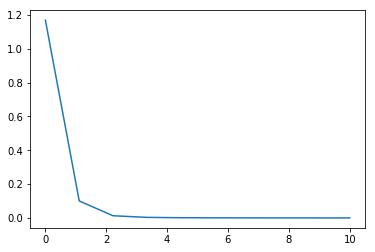

In [128]:
plt.plot(taus, mse)
# plt.ylim(0, 1)